In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("test_loan_eligibility.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001528,Male,No,0.0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural
1,LP002804,Female,Yes,0.0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban
2,LP002945,Male,Yes,0.0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural
3,LP001784,Male,Yes,1.0,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural
4,LP001514,Female,Yes,0.0,Graduate,No,2330,4486.0,100.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
118,LP002178,Male,Yes,0.0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban
119,LP001910,Male,No,1.0,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban
120,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
121,LP001935,Male,No,0.0,Graduate,No,9508,0.0,187.0,360.0,1.0,Rural


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             123 non-null    object 
 2   Married            123 non-null    object 
 3   Dependents         123 non-null    int32  
 4   Education          123 non-null    object 
 5   Self_Employed      123 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         123 non-null    float64
 9   Loan_Amount_Term   123 non-null    float64
 10  Credit_History     123 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 11.2+ KB


In [4]:
# Check for missing values
df.isnull().sum()

Loan_ID              0
Gender               2
Married              0
Dependents           7
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           2
Loan_Amount_Term     2
Credit_History       7
Property_Area        0
dtype: int64

In [5]:
# Handling missing value 
df["Gender"] = df["Gender"].fillna(df["Gender"]).mode()[0]
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mean())
df["Education"] = df["Education"].fillna(df["Education"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [6]:
# Check for duplicated 
df.duplicated().sum()

0

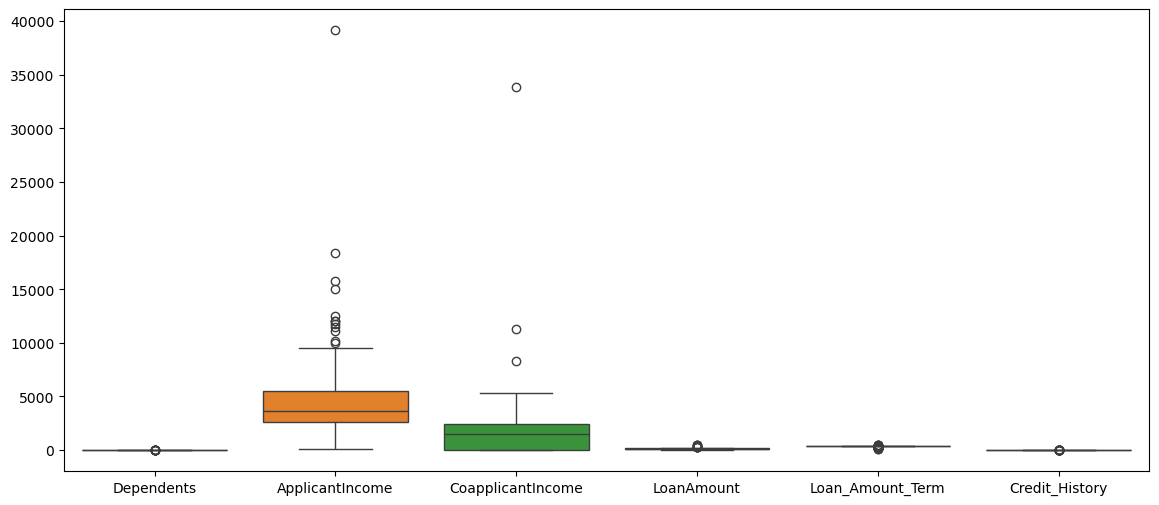

In [91]:
# Check for outliers 
plt.figure(figsize = (14,6))
sns.boxplot(data = df)
plt.show()

In [8]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_clean = df[(df['ApplicantIncome'] >= lower_limit) & (df['ApplicantIncome'] <= upper_limit)]


In [9]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_clean = df[(df['CoapplicantIncome'] >= lower_limit) & (df['CoapplicantIncome'] <= upper_limit)]


In [41]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.723577,4898.333333,1827.659512,142.917355,344.826446,0.810345
std,1.042544,4438.739824,3423.180578,79.031182,61.798015,0.382267
min,0.000000,150.000000,0.000000,25.000000,84.000000,0.000000
25%,0.000000,2649.000000,0.000000,101.000000,360.000000,1.000000
50%,0.000000,3620.000000,1483.000000,124.000000,360.000000,1.000000
75%,1.000000,5509.500000,2479.000000,163.000000,360.000000,1.000000
max,3.000000,39147.000000,33837.000000,500.000000,480.000000,1.000000


In [37]:
df1 = pd.read_csv("train_loan_eligibility.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001535,Male,No,0.0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
1,LP001792,Male,Yes,1.0,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP002443,Male,Yes,2.0,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural,N
3,LP002517,Male,Yes,1.0,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural,N
4,LP001894,Male,Yes,0.0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP001744,Male,No,0.0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban,Y
487,LP002138,Male,Yes,0.0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
488,LP001068,Male,Yes,0.0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
489,LP001327,Female,Yes,0.0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            488 non-null    object 
 3   Dependents         483 non-null    float64
 4   Education          491 non-null    object 
 5   Self_Employed      464 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         471 non-null    float64
 9   Loan_Amount_Term   479 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 50.0+ KB


In [43]:
# Check for missing value 
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               3
Dependents            8
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
df1["Gender"] = df1["Gender"].fillna(df1["Gender"].mode()[0])
df1["Self_Employed"] = df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0])
df1["LoanAmount"] = df1["LoanAmount"].fillna(df1["LoanAmount"].mean())
df1["Loan_Amount_Term"] = df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mean())
df1["Credit_History"] = df1["Credit_History"].fillna(df1["Credit_History"].mean())
df1["Married"] = df1["Married"].fillna(df1["Married"].mode()[0])
df1["Dependents"] = df1["Dependents"].fillna(df1["Dependents"].mean())


In [59]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
# Check for duplicated
df1.duplicated().sum()

0

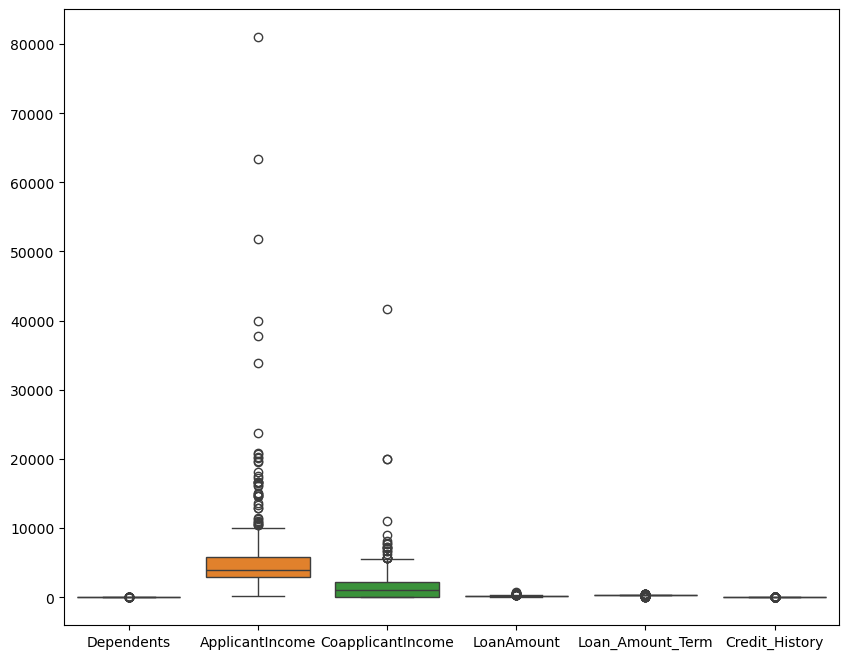

In [93]:
# Check for outliers 
plt.figure(figsize = (10 ,8))
sns.boxplot(data = df1)
plt.show()

In [69]:
Q1 = df1['ApplicantIncome'].quantile(0.25)
Q3 = df1['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_clean = df1[(df1['ApplicantIncome'] >= lower_limit) & (df1['ApplicantIncome'] <= upper_limit)]


In [71]:
Q1 = df1['CoapplicantIncome'].quantile(0.25)
Q3 = df1['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_clean = df1[(df1['CoapplicantIncome'] >= lower_limit) & (df1['CoapplicantIncome'] <= upper_limit)]

In [73]:
# check for summary 
df1.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761905,5529.997963,1569.537271,147.309979,341.286013,0.850446
std,0.997567,6457.784318,2789.523475,85.300510,65.043656,0.341007
min,0.000000,210.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2906.000000,0.000000,100.500000,360.000000,1.000000
50%,0.000000,3859.000000,1032.000000,130.000000,360.000000,1.000000
75%,1.000000,5825.000000,2241.000000,165.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [81]:
df.to_csv('test_loan_eligibility_cleaned.csv', index=False)
print("save it" )


save it


In [83]:
df1.to_csv('train_loan_eligibility_cleaned.csv', index=False)
print("save it" )

save it
